<a href="https://colab.research.google.com/github/vutukurisantosh/COVID-19/blob/master/Tesorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tesorflow For Classification and FaceDetection
Reference: https://www.tensorflow.org/tutorials/keras/classification

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print (tf.__version__)

2.2.0-rc3


In [0]:
#Working on Grayscale, 28x28, 70k images for classifying each image to 1 of 10 classes

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [20]:
#The above returns four numpy arrays, print just needs comma to seprate multiple outputs
print("Train_Images:",type(train_images))
print("Train_labels:",type(train_labels))
print("Test_Images:",type(test_images))
print("Test_Labels:",type(test_labels))

Train_Images: <class 'numpy.ndarray'>
Train_labels: <class 'numpy.ndarray'>
Test_Images: <class 'numpy.ndarray'>
Test_Labels: <class 'numpy.ndarray'>


In [0]:

#Creating corresponding labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [30]:
train_images.shape #60k Images in train
train_labels.shape
test_images.shape #10k Images in test
test_labels.shape
np.unique(train_labels) #10 classes in data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [127]:
train_images.shape

(60000, 28, 28)

In [128]:
test_images.shape

(10000, 28, 28)

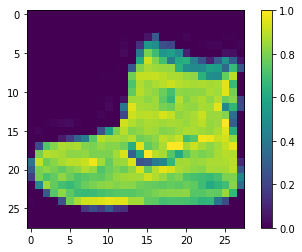

In [172]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
help(plt.imshow)

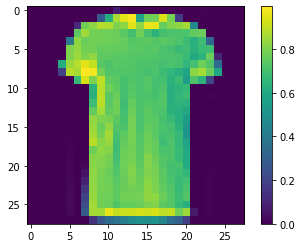

In [174]:
train_images[17]
plt.imshow(train_images[17])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [176]:
test_images[0].shape

(28, 28)

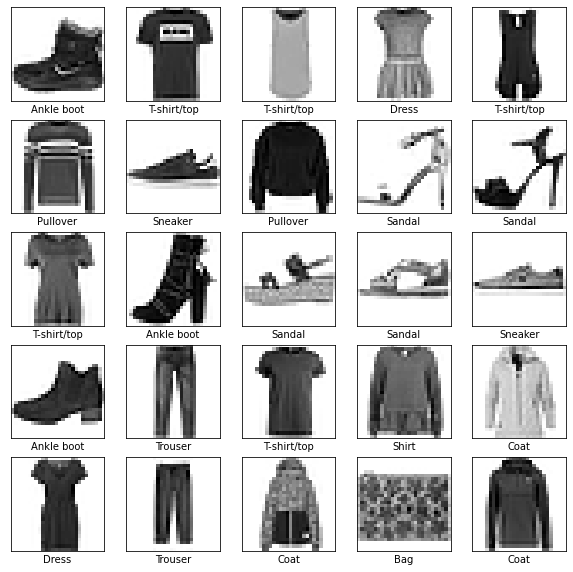

In [40]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [43]:
train_images[1].shape #28 rows and 28 columns

(28, 28)

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
#1 Set Up The Model
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(128,activation='relu'), #Aggregation and Activation
        keras.layers.Dense(10)
])

In [0]:
a = 'adam'
b = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
c = ['accuracy']

In [0]:
#2 Compile The Model
model.compile(optimizer=a,loss=b,metrics=c)

In [67]:
#3 Train The Model
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4924 - accuracy: 0.8274
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3716 - accuracy: 0.8659
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3348 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3087 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2915 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2764 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2649 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2537 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2446 - accuracy: 0.9088
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.236

In [73]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels,verbose=2)
print ('\nTest Accuracy:', test_accuracy)

313/313 - 0s - loss: 0.3368 - accuracy: 0.8857

Test Accuracy: 0.885699987411499


In [0]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [0]:
predict_test = probability_model.predict(test_images)

In [76]:
predict_test[0]

array([5.7528257e-05, 2.1955776e-10, 4.3410178e-06, 2.3060169e-09,
       7.0855299e-07, 4.0277338e-04, 2.7075710e-05, 3.1571744e-03,
       5.1640413e-06, 9.9634534e-01], dtype=float32)

In [78]:
class_names[np.argmax(predict_test[0])]

'Ankle boot'

In [187]:
img = test_images[119]
print (img.shape)

(28, 28)


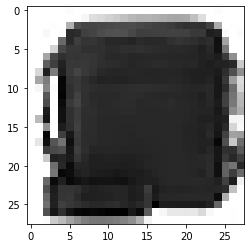

In [188]:
plt.imshow(img, cmap=plt.cm.binary)

In [189]:
img = np.expand_dims(img,0)
print (img.shape)

(1, 28, 28)


In [190]:
class_names[np.argmax(probability_model.predict(img))]

'Sandal'

In [0]:
##################

In [0]:
import cv2

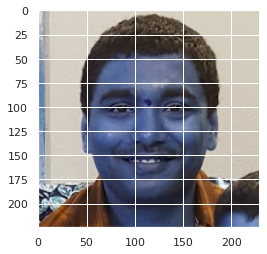

In [439]:
#im = cv2.imread("My_CBA.jpg",1)
im = cv2.imread("1.jpg",1)
plt.imshow(im, cmap=plt.cm.binary)

In [0]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [441]:
im.shape #height, width, depth
#im = im/255

(225, 230)

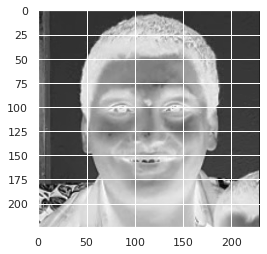

In [442]:
plt.imshow(im, cmap=plt.cm.binary)

In [0]:
#im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [444]:
im.shape #height, width, depth

(225, 230)

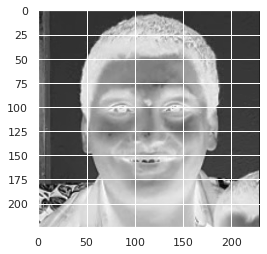

In [445]:
plt.imshow(im, cmap=plt.cm.binary)
im = im / 255.0

In [0]:
im_resized = cv2.resize(im, (28,28), interpolation = cv2.INTER_AREA)

In [447]:
im_resized.shape

(28, 28)

In [448]:
img = np.expand_dims(im_resized,0)
print (img.shape)

(1, 28, 28)


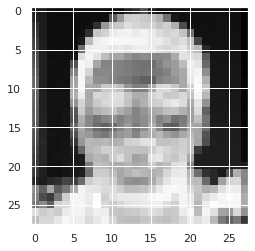

In [449]:
plt.imshow(im_resized, cmap=plt.cm.binary)

In [450]:
im_resized.shape

(28, 28)

In [451]:
img = np.expand_dims(im_resized,0)
print (img.shape)

(1, 28, 28)


In [452]:
class_names[np.argmax(probability_model.predict(img))]

'Bag'

In [453]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [0]:
###########Face Detection

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [0]:
from skimage import data, color, feature
import skimage.data

(300, 451, 3)


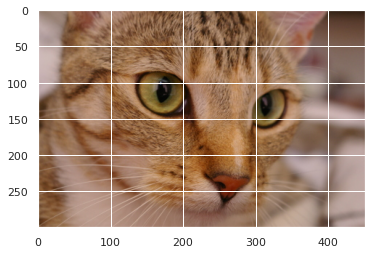

In [348]:
im = data.chelsea()
print (im.shape)
plt.imshow(im, cmap=plt.cm.binary)

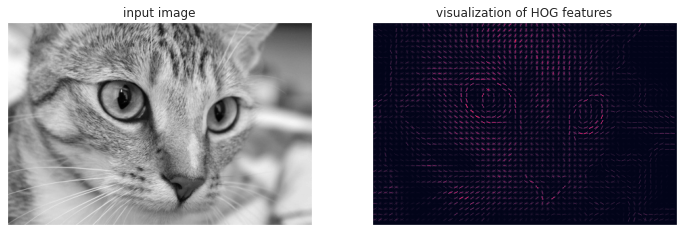

In [350]:
from skimage import data, color, feature
import skimage.data

image = color.rgb2gray(im)
hog_vec, hog_vis = feature.hog(image, visualize=True)
#hog_vec, hog_vis = feature.hog()

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');

In [351]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()
positive_patches = faces.images
positive_patches.shape

(13233, 62, 47)

In [0]:
from skimage import data, transform

imgs_to_use = ['camera', 'text', 'coins', 'moon',
               'page', 'clock', 'immunohistochemistry',
               'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)())
          for name in imgs_to_use]

In [353]:
from sklearn.feature_extraction.image import PatchExtractor

def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
                               max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size)
                            for patch in patches])
    return patches

negative_patches = np.vstack([extract_patches(im, 1000, scale)
                              for im in images for scale in [0.5, 1.0, 2.0]])
negative_patches.shape

(30000, 62, 47)

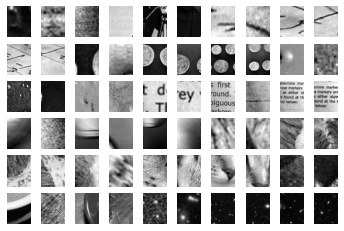

In [354]:
fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[500 * i], cmap='gray')
    axi.axis('off')

In [0]:
from itertools import chain
X_train = np.array([feature.hog(im)
                    for im in chain(positive_patches,
                                    negative_patches)])
y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1

In [356]:
X_train.shape

(43233, 1215)

In [0]:
im = X_train[0].shape

In [363]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

cross_val_score(GaussianNB(), X_train, y_train)

array([0.94784318, 0.97189777, 0.97236036, 0.97490169, 0.97374508])

In [365]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(X_train, y_train)
grid.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

0.9884347176442481

In [366]:
grid.best_params_

{'C': 1.0}

In [367]:
model = grid.best_estimator_
model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

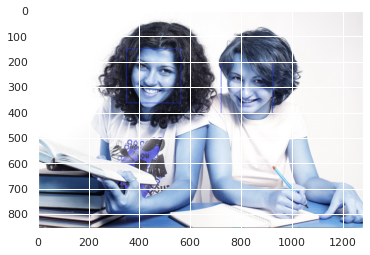

In [422]:
#im = cv2.imread("My_CBA.jpg",1)
im = cv2.imread("31.jpg",1)
plt.imshow(im, cmap=plt.cm.binary)
im = cv2.resize(im, (140,160), interpolation = cv2.INTER_AREA)
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
test_image = im

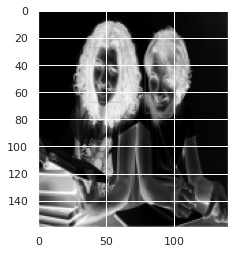

In [423]:
plt.imshow(im, cmap=plt.cm.binary)

In [0]:
#test_image = im
##test_image = skimage.data.astronaut()
#test_image = skimage.color.rgb2gray(test_image)
#test_image = skimage.transform.rescale(test_image, 0.5)
#test_image = test_image[:160, 40:180]

#plt.imshow(test_image, cmap='gray')
#plt.axis('off');

In [418]:
def sliding_window(img, patch_size=positive_patches[0].shape,istep=2, jstep=2, scale=1.0):
    Ni, Nj = (int(scale * s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i + Ni, j:j + Nj]
            if scale != 1:
                patch = transform.resize(patch, patch_size)
            yield (i, j), patch
            
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([feature.hog(patch) for patch in patches])
patches_hog.shape

(1911, 1215)

In [419]:
labels = model.predict(patches_hog)
labels.sum()

16.0

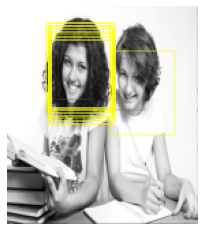

In [421]:
fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')

Ni, Nj = positive_patches[0].shape
indices = np.array(indices)

for i, j in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='yellow',
                               alpha=0.3, lw=2, facecolor='none'))